# Breast Cancer Classification with SVM 

In [ ]:
Using SVM to build and train a model using human cell records, and classify cells to whether the samples are
benign (mild state) or malignant (evil state).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# loding data from csv file
cell_df = pd.read_csv('cell_samples.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

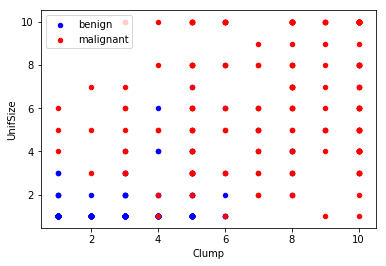

In [19]:
# Distribution of Classes
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant', ax=axes) 

In [21]:
# Identifying unwanted columns
cell_df.dtypes

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [28]:
# Removing unwanted columns
cell_df.columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#cell_df 100 rows and 11 columns,
#picked 9 columns out of 11

# Independent Variable
X = np.asarray(feature_df)

# Dependent Variable
y = np.asarray(cell_df['Class'])


y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [29]:
# Divide the Data as Train/Test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 546 x 9
X_train.shape

# 546 x 1
y_train.shape

# 137 x 9
X_test.shape

# 137 x 1
y_test.shape

(137,)

In [31]:
# Modeling (SVM with Scikit-learn)
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [32]:
# Evaluation (Results)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          2       1.00      0.94      0.97        90
          4       0.90      1.00      0.95        47

avg / total       0.97      0.96      0.96       137

